<a href="https://colab.research.google.com/github/Ngamimuli/karamoja-food-security-dashboard/blob/main/Gloria_Karamoja_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Food Security and Crop Yield Analysis in Karamoja, Uganda***
*   NAME : Gloria Muli
*   Tableau link: [https://public.tableau.com/views/GloriaKaramojaanalysis/Story1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link])



* TEAM LEAD : Veronica Isiaho
*  LINK TO PRESENTATION: [https://www.canva.com/design/DAGPbefwvvI/Z1JuxD_3VkpL-xM43609-g/edit?utm_content=DAGPbefwvvI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton]




# INTRODUCTION
Karamoja, located in the northeastern part of Uganda, is recognized as the most food-insecure region of the country. The region faces significant challenges in agricultural productivity, primarily due to prolonged droughts, pest infestations, and disease outbreaks that severely impact crop yields. These issues contribute to the overall vulnerability of the local population, who depend heavily on staple crops like sorghum and maize for sustenance.

In response to these challenges, several non-governmental organizations (NGOs) have been actively providing technical support and essential farm inputs to help farmers in Karamoja improve their yields. However, these efforts are often hindered by a lack of comprehensive visibility into the overall state of the region. NGOs frequently rely on fragmented and localized data sources, making it difficult to effectively prioritize their activities and allocate resources.

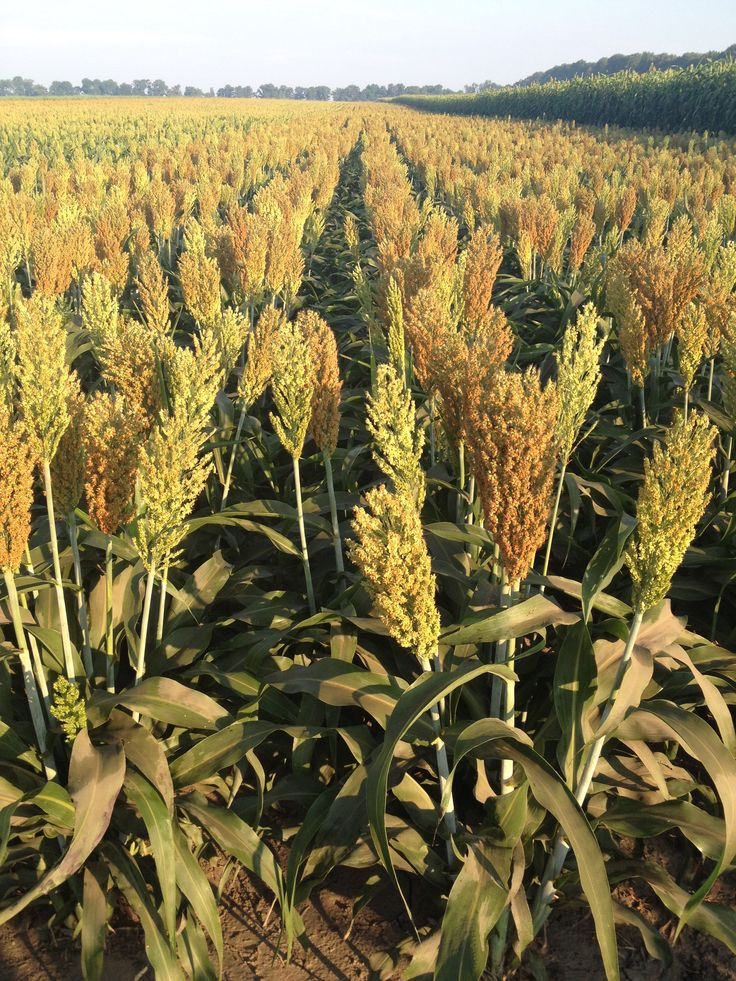

# PROBLEN STATEMENT
To enhance the decision-making capabilities of NGOs working in Karamoja, Dalberg Data Insights (DDI) has been commissioned to develop a new Food Security Monitoring Tool. This tool aims to provide a more accurate and comprehensive overview of the region's agricultural productivity. DDI has developed a methodology for remotely assessing the yields of the two main staple crops, sorghum and maize, using satellite imagery. The agri-tech team has successfully applied this model to analyze the 2017 crop season.
I have been tasked with creating an interactive visualization tool to present the results of this analysis. This tool will serve as an initial prototype of the Food Security Monitoring Tool that DDI plans to develop for the NGO. The client has specified that the visualization must include a map and allow for data visualization by district or sub-county, which are the two administrative levels used by the NGO. I am expected to deliver a preliminary draft of this tool within three working days, with creative freedom regarding its structure and functionalities.

In [45]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


The code below loads two datasets containing crop yield and population data for the Karamoja region of Uganda at two different administrative levels: district and sub-county. The data is read from CSV files and stored in DataFrames for further analysis and visualization

In [46]:
# the code below loads our data
df = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv', index_col=0)
df = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv', index_col=0)

The code below assigns the variable df1 to the DataFrame created from the first dataset, which contains crop yield and population data at the district level for the Karamoja region. It then displays the first five rows of this data using the head() function to provide a quick preview of the dataset's structure and content.

In [47]:
# Assigning variable df1 to the first data
# viewing the first five sample of the data
df1 = df = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv', index_col=0)
df1.head()

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,
92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


The code below loads crop yield and population data at the sub-county level into df2 and displays the first five rows. It then checks for duplicate rows in both district-level (df1) and sub-county-level (df2) datasets to ensure data quality.

In [48]:
 #Assigning variable df2 to the first data
# viewing the first sample of the data
df2 = df = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv', index_col=0)
df2.head()
#checking for duplcates
[df1.duplicated().sum(), df2.duplicated().sum()]

[0, 0]

The following code checks for missing values in both the district-level (df1) and sub-county-level (df2) datasets. It uses the isnull().sum() function to count the number of missing values in each column of both DataFrames.

In [49]:
#checking for missing values
[df1.isnull().sum(), df2.isnull().sum()]

[NAME            0
 POP             0
 Area            0
 S_Yield_Ha      0
 M_Yield_Ha      0
 Crop_Area_Ha    0
 S_Area_Ha       0
 M_Area_Ha       0
 S_Prod_Tot      0
 M_Prod_Tot      0
 dtype: int64,
 SUBCOUNTY_NAME    0
 DISTRICT_NAME     0
 POP               0
 Area              0
 Karamoja          0
 S_Yield_Ha        0
 M_Yield_Ha        0
 Crop_Area_Ha      0
 S_Area_Ha         0
 M_Area_Ha         0
 S_Prod_Tot        0
 M_Prod_Tot        0
 dtype: int64]

The below code combines the two DataFrames, df1 (district-level data) and df2 (sub-county-level data), into a single DataFrame called combined_df using an outer merge. This merge operation aligns the data by columns, ensuring all rows from both DataFrames are included, even if they do not have corresponding matches.

In [50]:
# combining the data frames by columns
combined_df = pd.merge(df1, df2, how='outer')
df.head()

<ipython-input-50-b62558144669>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  combined_df = pd.merge(df1, df2, how='outer')


,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In above, The combined DataFrame (combined_df) contains columns from both df1 and df2. The head() function displays the first five rows of combined_df, showing a preview of the merged dataset. Any rows with missing data from either DataFrame will have NaN in the respective columns.

The below code fills missing values in the numeric columns of the combined DataFrame (combined_df) with the mean of each column. It first selects all numeric columns using select_dtypes and then uses fillna to replace NaN values with the column means. This ensures no missing data in the numeric columns of the dataset.

In [51]:

# filling the missing values in the column region with mean for numeric value
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())


The folowing code fills missing values in the non-numeric columns of the combined DataFrame (combined_df) with the most frequent value (mode) of each column. It first identifies non-numeric columns using select_dtypes and then uses fillna with mode() to replace NaN values with the most common entry. This ensures that non-numeric columns have no missing data.

In [52]:
# filling missing values for non-numeric columns
non_numeric_columns = combined_df.select_dtypes(exclude=[np.number]).columns
combined_df[non_numeric_columns] = combined_df[non_numeric_columns].fillna(combined_df[non_numeric_columns].mode().iloc[0])

The code below saves the combined DataFrame (combined_df) to a CSV file named Karamoja_combined_df.csv without including the index column.

In [53]:
# saving the combined dataset
combined_df.to_csv('Karamoja_combined_df.csv', index=False)

The following code adds a new column, POP_DENSITY, to the DataFrame df3 by dividing the Area column by the POP column to calculate population density.
*This operation is important for providing a metric that can help in analyzing how population is distributed across different areas, which can be crucial for understanding and addressing food security needs.*









In [54]:
# data engineering

# addding a column of population density
df3 = df.assign(POP_DENSITY = lambda x: x['Area'] / x['POP'])

The following code adds a TOTAL_PROD_PER_HA column to df3, calculating sorghum production per hectare by dividing S_Prod_Tot by Area. This metric measures crop productivity per unit area. **It is crucial for evaluating agricultural efficiency and understanding regional variations in productivity. This information aids in optimizing farming practices and improving food security**.









In [55]:
# adding a column of total production per hectare for sorghum
df3 = df.assign(TOTAL_PROD_PER_HA = lambda x: x['S_Prod_Tot'] / x['Area'])

In [56]:
# Plotting a visaulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


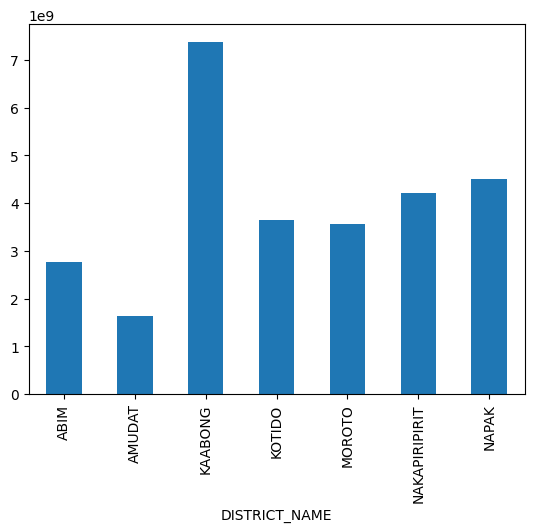

In [57]:
# plotting bar graph to show production by hector by DISTRICT_NAME
df3.groupby('DISTRICT_NAME')['Area'].sum().plot(kind='bar')
plt.show()


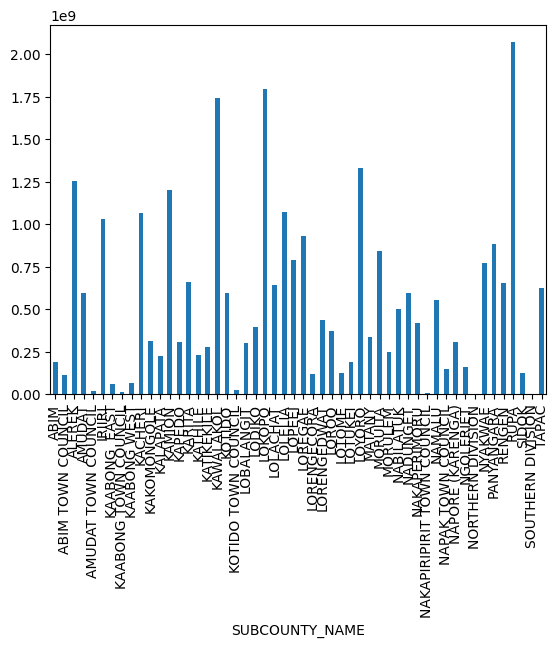

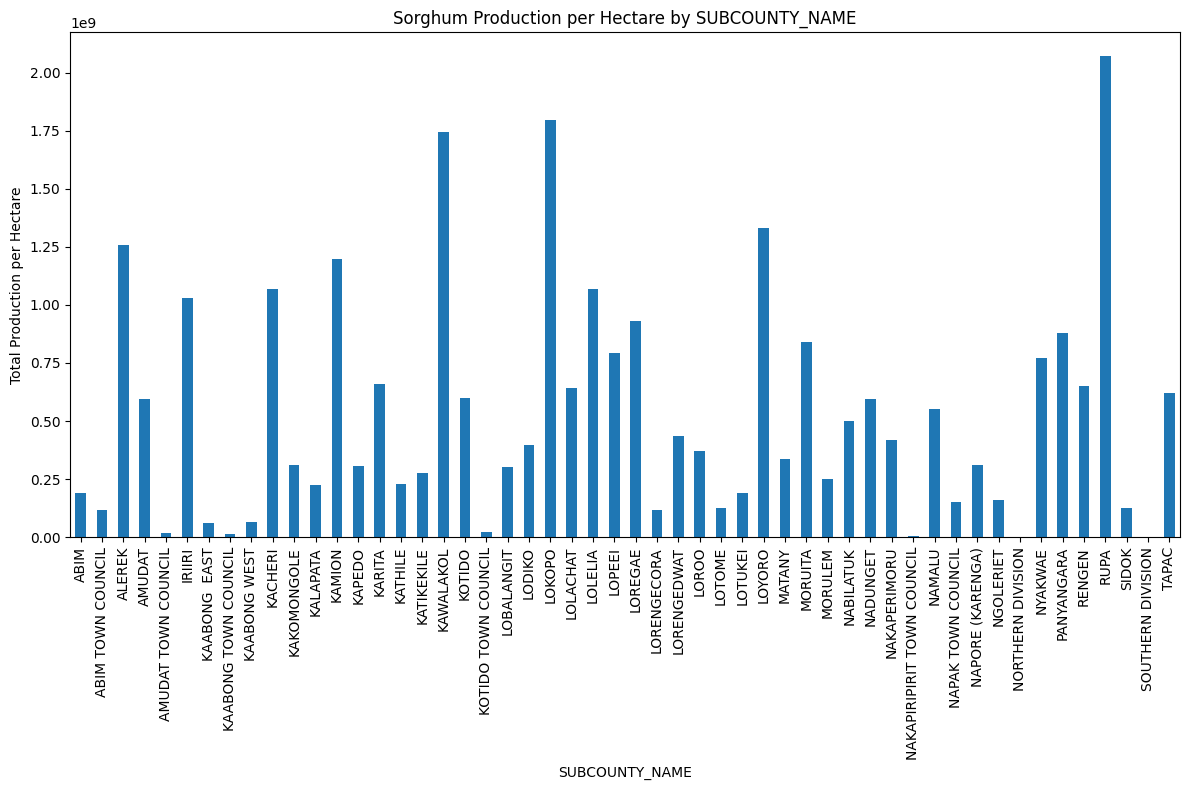

In [58]:
# plotting bar graph to show production by hector by SUBCOUNTY_NAME
df3.groupby('SUBCOUNTY_NAME')['Area'].sum().plot(kind='bar')
plt.show()
plt.figure(figsize=(12, 8))
df3.groupby('SUBCOUNTY_NAME')['Area'].sum().plot(kind='bar')
plt.xlabel('SUBCOUNTY_NAME')
plt.ylabel('Total Production per Hectare')
plt.title('Sorghum Production per Hectare by SUBCOUNTY_NAME')
plt.xticks(rotation=90)
plt.tight_layout()


# CONCLUSION:
The analysis reveals significant variability in crop yields and population density across different districts and sub-counties in the Karamoja region. Areas with lower yields and higher population densities are particularly vulnerable to food insecurity, highlighting the need for targeted interventions.

# Recommendations:
1. Targeted Agricultural Support: Focus resources and support, such as drought-resistant crops and pest management programs, in districts with the lowest crop yields.

2. Improve Data Collection: Enhance data collection methods to include real-time monitoring of crop health and environmental factors to provide timely insights for decision-making.

3. Community Education Programs: Implement community-based education programs on sustainable farming practices and climate adaptation strategies to improve resilience against food insecurity.